In [10]:
#load the dataset
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/Hotel_Reviews.csv")
df.head()
required_columns=['Hotel_Address','Average_Score','Hotel_Name','Negative_Review','Positive_Review','Total_Number_of_Reviews','Reviewer_Score','lat','lng']
#filter the dataset to include only the required columns
df2=df[required_columns]
df2.head()
#replace No Negative and No Positive with empty string in Negative_Review column and Positive_Review column respectively
df2['Negative_Review']=df2['Negative_Review'].replace('No Negative', '')
df2['Positive_Review']=df2['Positive_Review'].replace('No Positive', '')
df2.head()

/var/folders/lb/b10ttmcx6p96khnw319kfyth0000gn/T/ipykernel_48575/1011049717.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Negative_Review']=df2['Negative_Review'].replace('No Negative', '')


,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Total_Number_of_Reviews,Reviewer_Score,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,1403,2.9,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,,No real complaints the hotel was great great ...,1403,7.5,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,1403,7.1,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,1403,3.8,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,1403,6.7,52.360576,4.915968


In [4]:
#generate a new column called review which is a combination of positive and negative reviews
df2['review']=df2['Negative_Review']+df2['Positive_Review']
df2.head()
#write the dataframe to a csv file
# df2.to_csv("/Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/Hotel_Reviews_cleaned.csv",index=False)

/var/folders/lb/b10ttmcx6p96khnw319kfyth0000gn/T/ipykernel_35357/1078201825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review']=df2['Negative_Review']+df2['Positive_Review']


,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Total_Number_of_Reviews,Reviewer_Score,lat,lng,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,1403,2.9,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,,No real complaints the hotel was great great ...,1403,7.5,52.360576,4.915968,No real complaints the hotel was great great ...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,1403,7.1,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,1403,3.8,52.360576,4.915968,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,1403,6.7,52.360576,4.915968,You When I booked with your company on line y...


In [5]:
#Randomly sample 1000 rows from the dataset
# df3=df2.sample(n=1000,random_state=1)
df3=df2
df3.head()
df3.shape


(515738, 10)

In [6]:
#grouped reviews by hotel name into one big review string
df4=df3.groupby('Hotel_Name')['review'].apply(lambda x: "%s" % ' '.join(x)).reset_index()
df4.head()
df4.rename(columns={'review':'Combined_review'},inplace=True)
#df4['Combined_review'][2]
# df4.shape

In [106]:
#install spacy  
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.3 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [7]:
#load the spacy model
import spacy
nlp = spacy.load("en_core_web_lg")
         

In [38]:
df5=df4[:]
df5.head()
df5.shape

(1492, 2)

In [39]:
# ## extract all nouns and adjective pairs from the combined review columns into a dictionary with key as the noun and value as the adjective add new column to the dataframe with the dictionary and another columns with list of all nouns
# from collections import defaultdict
# noun_adj_dict=defaultdict(list)
# noun_list=[]
# i=1
# #add a new 
# master_noun_adj_dict_list=[]
# master_noun_list=[]

# for j in range(df5.shape[0]):
#     sentence=df5['Combined_review'][j].lower()
#     noun_adj_dict = {}
#     noun_list = []
#     doc = nlp(sentence)
#     print(i)
#     i+=1
#     for token in doc:
#         if token.pos_ == 'NOUN':
#             noun_adj_dict[token.text]=[]
#             noun_list.append(token.text)
#             for child in token.children:
#                 if child.pos_ == 'ADJ':
#                     noun_adj_dict[token.text].append(child.text)
#     master_noun_adj_dict_list.append(noun_adj_dict)
#     master_noun_list.append(noun_list)
# df5['noun_adj_dict']=master_noun_adj_dict_list
# df5['noun_list']=master_noun_list
# # df4['noun_adj_dict'][j]=noun_adj_dict
# # df4['noun_list'][j]=noun_list
# df5.head()

# # list_of_nouns.extend(df5['noun_list'].tolist())

# # print(list_of_nouns)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/var/folders/lb/b10ttmcx6p96khnw319kfyth0000gn/T/ipykernel_35357/2819607250.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['noun_adj_dict']=master_noun_adj_dict_list
/var/folders/lb/b10ttmcx6p96khnw319kfyth0000gn/T/ipykernel_35357/2819607250.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['noun_list']=master_noun_list


,Hotel_Name,Combined_review,noun_adj_dict,noun_list
0,11 Cadogan Gardens,Thought the prise of drinks at the bar a litt...,"{'prise': [], 'drinks': ['more'], 'bar': [], '...","[prise, drinks, bar, welcome, hotel, location,..."
1,1K Hotel,Air conditioning in room didn t work and desp...,"{'air': [], 'conditioning': ['noisy'], 'room':...","[air, conditioning, room, work, wasn, t, carpe..."
2,25hours Hotel beim MuseumsQuartier,Breakfast not included and buffet really expe...,"{'breakfast': [], 'style': [], 'middle': [], '...","[breakfast, style, middle, rooftop, bar, resta..."
3,41,There wasn t a thing that we didn t like Its...,"{'thing': [], 'proximity': [], 'services': ['g...","[thing, proximity, services, restaurants, staf..."
4,45 Park Lane Dorchester Collection,More kinds of fruit juice will make the mini ...,"{'kinds': ['more'], 'fruit': [], 'juice': [], ...","[kinds, fruit, juice, bar, staffs, room, way, ..."


In [40]:
# #write df5 to a csv file
# df5.to_csv("/Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/Hotel_Reviews_cleaned_nouns_and_adjs.csv",index=True)

In [1]:
#load the csv file
import pandas as pd
df5=pd.read_csv("/Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/Hotel_Reviews_cleaned_nouns_and_adjs.csv")
df5.head()

,Unnamed: 0,Hotel_Name,Combined_review,noun_adj_dict,noun_list
0,0,11 Cadogan Gardens,Thought the prise of drinks at the bar a litt...,"{'prise': [], 'drinks': ['more'], 'bar': [], '...","['prise', 'drinks', 'bar', 'welcome', 'hotel',..."
1,1,1K Hotel,Air conditioning in room didn t work and desp...,"{'air': [], 'conditioning': ['noisy'], 'room':...","['air', 'conditioning', 'room', 'work', 'wasn'..."
2,2,25hours Hotel beim MuseumsQuartier,Breakfast not included and buffet really expe...,"{'breakfast': [], 'style': [], 'middle': [], '...","['breakfast', 'style', 'middle', 'rooftop', 'b..."
3,3,41,There wasn t a thing that we didn t like Its...,"{'thing': [], 'proximity': [], 'services': ['g...","['thing', 'proximity', 'services', 'restaurant..."
4,4,45 Park Lane Dorchester Collection,More kinds of fruit juice will make the mini ...,"{'kinds': ['more'], 'fruit': [], 'juice': [], ...","['kinds', 'fruit', 'juice', 'bar', 'staffs', '..."


In [22]:
#extracting the nouns from the above dataframe
import re
list_of_nouns=[]
for i in range(df5.shape[0]):
    list_of_nouns.extend(
        re.sub(r'[^a-zA-Z0-9\s]', '', df5['noun_list'][i]).split())


['prise', 'drinks', 'bar', 'welcome', 'hotel', 'location', 'size', 'room', 'bathroom', 'friends', 'relatives', 'problems', 'building', 'charm', 'property', 'staff', 'atmosphere', 'staff', 'luxury', 'hotel']


In [25]:
#dropping duplicates from the list of nouns
list_of_nouns_wdp=list((set(list_of_nouns)))

#sorting list of nouns_wdp in alphabetical order
list_of_nouns_wdp.sort()
print(len(list_of_nouns_wdp))
print(len(list_of_nouns))



43779
4384093


In [45]:
#write the list of nouns to a csv file
import csv
with open('/Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/list_of_nouns.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(list_of_nouns_wdp)

#load the list of nouns from the csv file
list_of_nouns_wdp=pd.read_csv("/Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/list_of_nouns.csv")
list_of_nouns_wdp.head()


,00a,00am,00at,00eur,00gbp,00h,00hours,00hrs,00p,00pm,...,zuidas,zuin,zuiver,zum,zusje,zwarte,zwembad,zzstaff,zzzound,zzzzz


In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

 Hotel breakfast very very limited especially for hot food Cold was the usual and plent of deserts and fruits room for improvment here like hasbrowns Very hard on vegetarians Room not very well cleanned found hair in both the room and bathroom We also has some insect presence in a day Bed with all the sheet layers are always sliding off painful to sleep on them The hotel had no facilites like a gym or pool  Its very convinient for public transport you have all options 5 mins away There is also a mall in the Espanya squre with food and restaurant Very good area and direct transport from airport with A1 or A2 stops there Room has air conditioning that is a must in a hot city as Barcelona  breakfast was not up to the usual standards of this hotel tables were not cleared and we had to wait for a table hot food was not replenished very quickly  everything was great as usual   Housekeeping staff a little noisy in mornings despite DONOT disturb sign Very Comfortable spacious clean quiet we ha

In [124]:
#sample 1000 rows from the dataset df2
df6=df2.sample(n=100000,random_state=42).reset_index(drop=True)
df6.head()
#print first review
df6['review'][0]

' Would have appreciated a shop in the hotel that sold drinking water etc but not necessity Would recommend if like us you arrive late at night to bring drinks from plane airport as there s no shop nearby There is a minibar though if you want to pay those prices  Hotel was great clean friendly staff free breakfast every morning with good selection good wifi connection nice sized room with bath fridge in room Personally loved the fact that the hotel isn t in the city centre but is literally next to a train station that you can easily get to and from the airport city Would definitely stay again '

In [125]:
#preprocess the review column and generate a new column called review_processed
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, df6.shape[0]):
    review = re.sub('[^a-zA-Z \s]', '', df6.loc[i,'review'])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
df6['review_processed']=corpus
df6.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Total_Number_of_Reviews,Reviewer_Score,lat,lng,review,review_processed
0,Via Senigallia 6 20161 Milan Italy,8.1,Hotel Da Vinci,Would have appreciated a shop in the hotel th...,Hotel was great clean friendly staff free bre...,16670,9.6,45.533137,9.171102,Would have appreciated a shop in the hotel th...,would appreci shop hotel sold drink water etc ...
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,8.6,Urban Lodge Hotel,No tissue paper box was present at the room,,5018,8.8,52.385649,4.834443,No tissue paper box was present at the room,tissu paper box present room
2,Mallorca 251 Eixample 08008 Barcelona Spain,8.3,Alexandra Barcelona A DoubleTree by Hilton,Pillows,Nice welcoming and service,351,7.9,41.393192,2.161520,Pillows Nice welcoming and service,pillow nice welcom servic
3,Piazza Della Repubblica 17 Central Station 201...,9.1,Hotel Principe Di Savoia,,Everything including the nice upgrade The Hot...,1543,10.0,45.479888,9.196298,Everything including the nice upgrade The Hot...,everyth includ nice upgrad hotel revamp surpri...
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,9.1,Hotel Esther a,,Lovely hotel v welcoming staff,4687,9.6,52.370545,4.888644,Lovely hotel v welcoming staff,love hotel v welcom staff


In [126]:
#apply LDA to the review_processed column and extract 5 topics
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.8,stop_words=stopwords.words('english'), max_features=10000, ngram_range=(2,2))
X = cv.fit_transform(df6['review_processed'])
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(X)
print(X.shape)
#extract the top 10 words for each topic
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')


(100000, 10000)
Top 10 words for topic #0:
['locat close', 'breakfast good', 'good breakfast', 'walk distanc', 'min walk', 'staff friendli', 'train station', 'metro station', 'good locat', 'minut walk']


Top 10 words for topic #1:
['good locat', 'staff friendli', 'comfi bed', 'valu money', 'excel locat', 'friendli help', 'comfort bed', 'help staff', 'friendli staff', 'great locat']


Top 10 words for topic #2:
['car park', 'doubl room', 'even though', 'one night', 'doubl bed', 'room clean', 'room small', 'book com', 'star hotel', 'room servic']


Top 10 words for topic #3:
['locat good', 'air con', 'breakfast good', 'room locat', 'bed comfort', 'staff friendli', 'staff help', 'small room', 'room small', 'air condit']


Top 10 words for topic #4:
['room clean', 'hotel staff', 'would definit', 'front desk', 'staff extrem', 'bed comfort', 'bed comfi', 'friendli help', 'staff friendli', 'staff help']




In [127]:
print(X.shape)


(100000, 10000)


In [128]:
for i, topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')


Top 10 words for topic #0:
['nice hotel', 'hotel good', 'tube station', 'hotel locat', 'locat near', 'room nice', 'room good', 'room clean', 'citi centr', 'citi center', 'locat close', 'breakfast good', 'good breakfast', 'walk distanc', 'min walk', 'staff friendli', 'train station', 'metro station', 'good locat', 'minut walk']


Top 10 words for topic #1:
['good valu', 'great breakfast', 'great staff', 'locat friendli', 'hotel great', 'room great', 'comfort room', 'locat great', 'clean room', 'staff great', 'good locat', 'staff friendli', 'comfi bed', 'valu money', 'excel locat', 'friendli help', 'comfort bed', 'help staff', 'friendli staff', 'great locat']


Top 10 words for topic #2:
['mini bar', 'night stay', 'locat good', 'singl bed', 'front desk', 'th floor', 'swim pool', 'breakfast includ', 'chang room', 'hotel room', 'car park', 'doubl room', 'even though', 'one night', 'doubl bed', 'room clean', 'room small', 'book com', 'star hotel', 'room servic']


Top 10 words for topic #3:

In [129]:
#Convert the reviews to a lower case
df6['review'] = df6['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df6['review'].head()

0    would have appreciated a shop in the hotel tha...
1          no tissue paper box was present at the room
2                   pillows nice welcoming and service
3    everything including the nice upgrade the hote...
4                       lovely hotel v welcoming staff
Name: review, dtype: object

In [130]:
#extract the topics from review column using bertopic
from bertopic import BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df6['review'])
# print(topics)


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-11-13 18:19:49,028 - BERTopic - Transformed documents to Embeddings
2022-11-13 18:20:18,126 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
To disable this war

2022-11-13 18:54:14,274 - BERTopic - Clustered reduced embeddings


[-1, -1, 10, -1, -1, 0, -1, 0, 491, -1, 3, 75, -1, 0, -1, 30, -1, 38, -1, -1, -1, -1, 36, 1, -1, -1, 151, 1, 15, 3, -1, 564, -1, 20, 22, -1, -1, -1, -1, 9, 10, -1, -1, 113, 1, 2, 0, -1, -1, -1, 15, -1, 1, -1, -1, 54, -1, 76, 1, 3, 290, 28, -1, -1, 172, 313, -1, 42, -1, -1, 125, 0, -1, 272, -1, 54, -1, 104, 77, 11, 76, 18, 18, -1, 2, 53, -1, -1, 58, -1, 102, 1, 170, 9, 0, -1, -1, -1, 187, -1, 0, 444, 308, 23, -1, 130, -1, 254, 152, 50, -1, 6, -1, 272, -1, 29, 21, -1, 95, 97, 164, -1, -1, 205, 153, -1, 2, -1, 4, 0, 39, -1, 144, 451, -1, 365, 218, 35, -1, 111, -1, -1, 84, 3, 15, -1, 5, -1, 23, 1, -1, -1, -1, 48, -1, -1, -1, 27, 38, -1, 34, -1, -1, 183, 127, -1, -1, 25, -1, -1, 74, -1, 33, -1, -1, 335, -1, -1, 82, 119, 139, -1, 2, -1, -1, -1, 161, 43, -1, 86, 38, -1, 115, -1, 8, 379, -1, -1, 0, 91, -1, 39, -1, 19, 10, 6, -1, -1, -1, 145, 78, -1, -1, 3, -1, 15, 58, -1, -1, 382, 469, 11, -1, -1, 32, 86, 329, -1, -1, 126, 15, 335, -1, 481, -1, 0, -1, 19, 45, 4, 38, 11, -1, 1, 78, 183, -1, 0, 

In [131]:
#generate topic labels for each topic
topic_model.generate_topic_labels()


['-1_was_the_and',
 '0_wifi_wi_fi',
 '1_london_tube_central',
 '2_tea_coffee_kettle',
 '3_parking_car_park',
 '4_lift_elevator_lifts',
 '5_food_restaurant_service',
 '6_pool_swimming_rooftop',
 '7_amsterdam_tram_central',
 '8_barcelona_beach_catalonia',
 '9_smell_smelled_smelly',
 '10_pillows_pillow_soft',
 '11_double_twin_single',
 '12_tv_channels_television',
 '13_bathroom_toilet_bathrooms',
 '14_friendly_location_staff',
 '15_lighting_dark_light',
 '16_paris_metro_french',
 '17_included_continental_breakfast',
 '18_check_ready_early',
 '19_milan_milano_centrale',
 '20_noise_noisy_hear',
 '21_birthday_cake_anniversary',
 '22_shower_water_curtain',
 '23_conditioning_air_ac',
 '24_breakfast_small_room',
 '25_heating_temperature_cold',
 '26_vienna_opera_city',
 '27_tram_stop_centre',
 '28_gym_fitness_weights',
 '29_smoking_smoke_cigarette',
 '30_perfect_helpful_location',
 '31_tube_station_close',
 '32_paddington_heathrow_station',
 '33_card_credit_deposit',
 '34_small_compact_bigger',


In [135]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,44797,-1_was_the_and_room
1,0,3336,0_wifi_wi_fi_internet
2,1,2997,1_london_tube_central_oxford
3,2,2083,2_tea_coffee_kettle_milk
4,3,1318,3_parking_car_park_garage
...,...,...,...
581,580,10,580_music_loud_background_complimenting
582,581,10,581_bunk_lamda_perilous_toppers
583,582,10,582_roof_rooftop_gay_flute
584,583,10,583_dryer_hair_affixed_ailment


In [136]:
topic_model.get_topic(5)

[('food', 0.018067349813720445),
 ('restaurant', 0.012831427475958562),
 ('service', 0.006133460811796578),
 ('meal', 0.005478149161644531),
 ('dinner', 0.005400612828813529),
 ('chips', 0.005322206849291206),
 ('pizza', 0.004843062480657819),
 ('ordered', 0.004539021632822304),
 ('chicken', 0.0044014934535257875),
 ('menu', 0.004362936190230597)]

In [85]:
#install vaderSentiment
!pip install vaderSentiment

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [137]:
#generate sentiment scores for each review
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']
df6['sentiment_score'] = df6['review'].apply(sentiment_analyzer_scores)
df6.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Total_Number_of_Reviews,Reviewer_Score,lat,lng,review,review_processed,sentiment_score
0,Via Senigallia 6 20161 Milan Italy,8.1,Hotel Da Vinci,Would have appreciated a shop in the hotel th...,Hotel was great clean friendly staff free bre...,16670,9.6,45.533137,9.171102,would have appreciated a shop in the hotel tha...,would appreci shop hotel sold drink water etc ...,0.9924
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,8.6,Urban Lodge Hotel,No tissue paper box was present at the room,,5018,8.8,52.385649,4.834443,no tissue paper box was present at the room,tissu paper box present room,-0.2960
2,Mallorca 251 Eixample 08008 Barcelona Spain,8.3,Alexandra Barcelona A DoubleTree by Hilton,Pillows,Nice welcoming and service,351,7.9,41.393192,2.161520,pillows nice welcoming and service,pillow nice welcom servic,0.6908
3,Piazza Della Repubblica 17 Central Station 201...,9.1,Hotel Principe Di Savoia,,Everything including the nice upgrade The Hot...,1543,10.0,45.479888,9.196298,everything including the nice upgrade the hote...,everyth includ nice upgrad hotel revamp surpri...,0.9153
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,9.1,Hotel Esther a,,Lovely hotel v welcoming staff,4687,9.6,52.370545,4.888644,lovely hotel v welcoming staff,love hotel v welcom staff,0.7717


In [158]:
#generate a new column called sentiment_label based on the sentiment_score
def sentiment_label(score):
    if score >= 0.25:
        return "Positive"
    elif score <= -0.25:
        return "Negative"
    else:
        return "Neutral"
df6['sentiment_label'] = df6['sentiment_score'].apply(sentiment_label)
df6.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Total_Number_of_Reviews,Reviewer_Score,lat,lng,review,review_processed,sentiment_score,sentiment_label
0,Via Senigallia 6 20161 Milan Italy,8.1,Hotel Da Vinci,Would have appreciated a shop in the hotel th...,Hotel was great clean friendly staff free bre...,16670,9.6,45.533137,9.171102,would have appreciated a shop in the hotel tha...,would appreci shop hotel sold drink water etc ...,0.9924,Positive
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,8.6,Urban Lodge Hotel,No tissue paper box was present at the room,,5018,8.8,52.385649,4.834443,no tissue paper box was present at the room,tissu paper box present room,-0.2960,Negative
2,Mallorca 251 Eixample 08008 Barcelona Spain,8.3,Alexandra Barcelona A DoubleTree by Hilton,Pillows,Nice welcoming and service,351,7.9,41.393192,2.161520,pillows nice welcoming and service,pillow nice welcom servic,0.6908,Positive
3,Piazza Della Repubblica 17 Central Station 201...,9.1,Hotel Principe Di Savoia,,Everything including the nice upgrade The Hot...,1543,10.0,45.479888,9.196298,everything including the nice upgrade the hote...,everyth includ nice upgrad hotel revamp surpri...,0.9153,Positive
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,9.1,Hotel Esther a,,Lovely hotel v welcoming staff,4687,9.6,52.370545,4.888644,lovely hotel v welcoming staff,love hotel v welcom staff,0.7717,Positive


In [159]:
#find the number of positive, negative and neutral reviews
df6['sentiment_label'].value_counts()


Positive    72286
Neutral     17278
Negative    10436
Name: sentiment_label, dtype: int64

In [162]:
#take equal number of positive, negative and neutral reviews for training the model
df7=df6[df6['sentiment_label']=='Positive'].sample(n=10436,random_state=42).reset_index(drop=True)
df8=df6[df6['sentiment_label']=='Negative'].sample(n=10436,random_state=42).reset_index(drop=True)
df9=df6[df6['sentiment_label']=='Neutral'].sample(n=10436,random_state=42).reset_index(drop=True)
df10=pd.concat([df7,df8,df9],axis=0).reset_index(drop=True)

[[1375  424  298]
 [ 599 1134  377]
 [ 253  200 1602]]
              precision    recall  f1-score   support

    Negative       0.62      0.66      0.64      2097
     Neutral       0.65      0.54      0.59      2110
    Positive       0.70      0.78      0.74      2055

    accuracy                           0.66      6262
   macro avg       0.66      0.66      0.65      6262
weighted avg       0.65      0.66      0.65      6262

0.6564995209198339


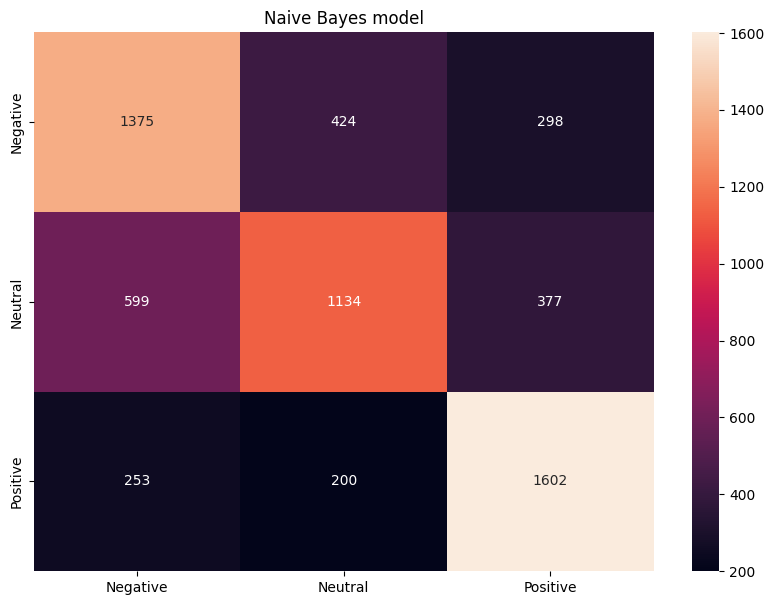

In [ ]:
#Find TF-IDF scores for each review and fit it to a naive bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(df10['review_processed']).toarray()
y = df10['sentiment_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#Confusion matrix with the predicted and actual values
confusion_matrix_NB=confusion_matrix(y_test,y_pred)
print(confusion_matrix_NB)
#plot the confusion matrix using seaborn with labels as the sentiment labels and title as the model name (Naive Bayes) predicted vs actual
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_NB,annot=True,fmt='d',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])
plt.title('Naive Bayes model')

#Classification report with the precision, recall and f1-score
classification_report_NB =classification_report(y_test,y_pred)
print(classification_report_NB)
#plot the classification report using seaborn
# sns.heatmap(classification_report_NB,annot=True,fmt='d')
# plt.show()

#Accuracy score
accuracy_NB=accuracy_score(y_test, y_pred)
print(accuracy_NB)

#AUC score for the model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, multi_class='ovr')






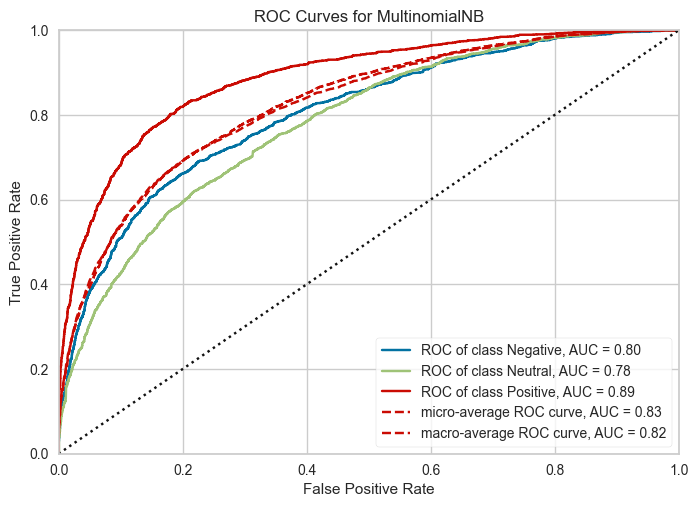

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Negative', 'Neutral', 'Positive'], estimator=MultinomialNB())

In [184]:
import yellowbrick.classifier 
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=['Negative','Neutral','Positive'])
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer
plot_ROC_curve(classifier, X_train,y_train, X_test,y_test)

              precision    recall  f1-score   support

    Negative       0.70      0.67      0.68      2097
     Neutral       0.69      0.68      0.69      2110
    Positive       0.81      0.84      0.82      2055

    accuracy                           0.73      6262
   macro avg       0.73      0.73      0.73      6262
weighted avg       0.73      0.73      0.73      6262

0.7302778664963271


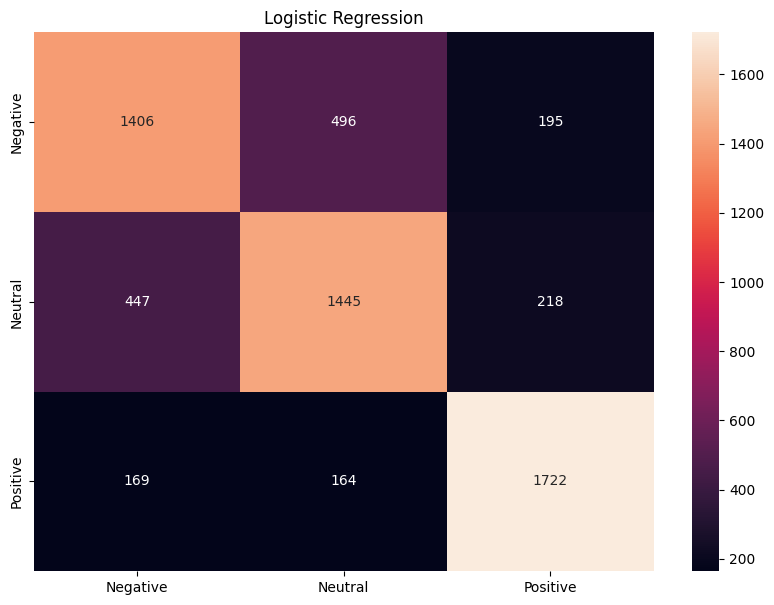

In [176]:
#Find TF-IDF scores for each review and fit it to a logistic regression classifier
from sklearn.linear_model import LogisticRegression
# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(df10['review_processed']).toarray()
y = df10['sentiment_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)
y_pred = classifier_log.predict(X_test)
#Confusion matrix with the predicted and actual values
confusion_matrix_LR=confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_LR,annot=True,fmt='d',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])
plt.title('Logistic Regression')
#Classification report with the precision, recall and f1-score
print(classification_report(y_test,y_pred))
#Accuracy score
print(accuracy_score(y_test, y_pred))





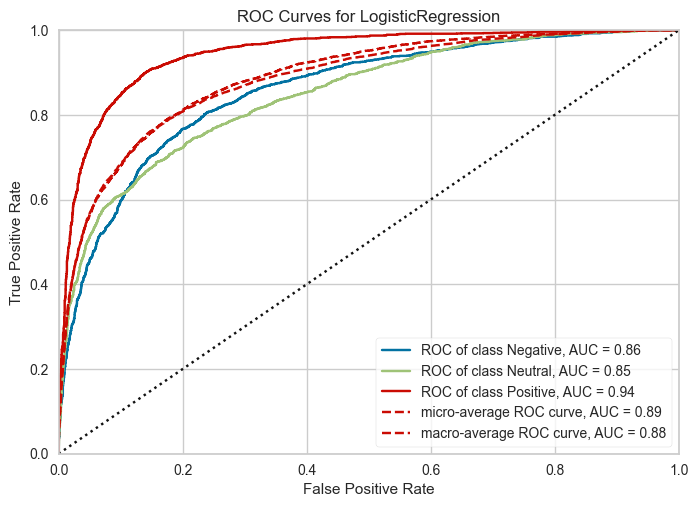

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Negative', 'Neutral', 'Positive'],
       estimator=LogisticRegression())

In [185]:
plot_ROC_curve(classifier_log, X_train,y_train, X_test,y_test)

In [178]:
!pip install yellowbrick

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 4.0 MB/s eta 0:00:00a 0:00:01


[[1497  432  168]
 [ 562 1372  176]
 [ 244  216 1595]]
              precision    recall  f1-score   support

    Negative       0.65      0.71      0.68      2097
     Neutral       0.68      0.65      0.66      2110
    Positive       0.82      0.78      0.80      2055

    accuracy                           0.71      6262
   macro avg       0.72      0.71      0.71      6262
weighted avg       0.72      0.71      0.71      6262

0.7128712871287128


AttributeError: predict_proba is not available when  probability=False

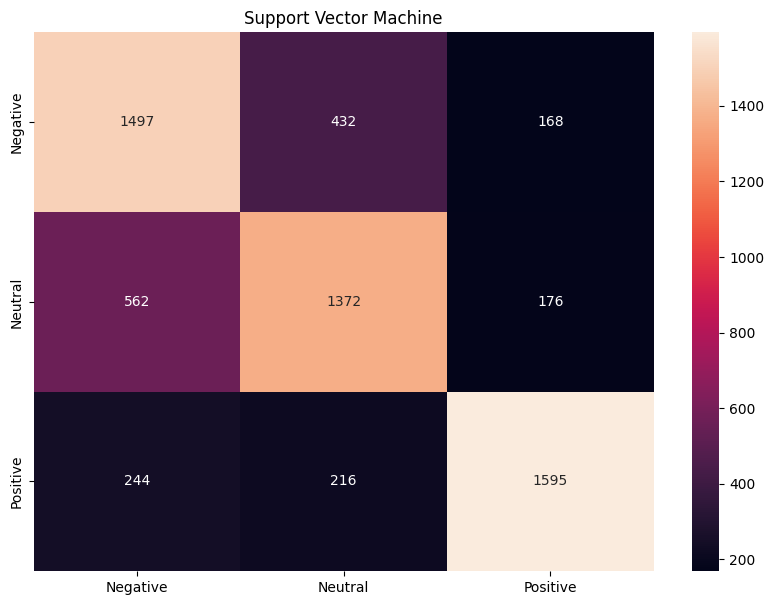

In [177]:
#Find TF-IDF scores for each review and fit it to a support vector machine classifier
from sklearn.svm import SVC
# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(df10['review_processed']).toarray()
y = df10['sentiment_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier_svm = SVC(kernel='rbf', gamma=0.5, C=0.1)
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)
#Confusion matrix with the predicted and actual values
print(confusion_matrix(y_test,y_pred))
confusion_matrix_SVM=confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_SVM,annot=True,fmt='d',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])
plt.title('Support Vector Machine')

#Classification report with the precision, recall and f1-score
print(classification_report(y_test,y_pred))
#Accuracy score
print(accuracy_score(y_test, y_pred))


# import yellowbrick.classifier import ROCAUC

# def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

#     # Creating visualization with the readable labels
#     visualizer = ROCAUC(model, encoder={0: 'functional', 
#                                         1: 'needs repair', 
#                                         2: 'nonfunctional'})
                                        
#     # Fitting to the training data first then scoring with the test data                                    
#     visualizer.fit(xtrain, ytrain)
#     visualizer.score(xtest, ytest)
#     visualizer.show()
    
#     return visualizer


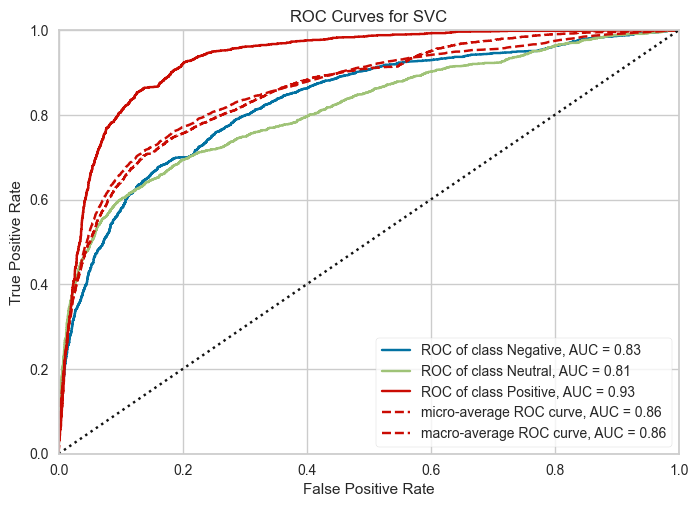

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Negative', 'Neutral', 'Positive'],
       estimator=SVC(C=0.1, gamma=0.5))

In [186]:
plot_ROC_curve(classifier_svm, X_train,y_train, X_test,y_test)

In [154]:
#Given a review, predict the sentiment
def predict_sentiment(review):
    review = re.sub('[^a-zA-Z \s]', '', review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review ]
    review = ' '.join(review)
    review = tfidfconverter.transform([review]).toarray()

    return classifier.predict(review), classifier_log.predict(review), classifier_rf.predict(review), classifier_svm.predict(review)

#Predict the sentiment of a review
review = "Taste is not good"
NB, LR, RF, SVM = predict_sentiment(review)
print("Naive Bayes: ", NB)
print("Logistic Regression: ", LR)
print("Random Forest: ", RF)
print("Support Vector Machine: ", SVM)


Naive Bayes:  ['Positive']
Logistic Regression:  ['Positive']
Random Forest:  ['Positive']
Support Vector Machine:  ['Positive']


In [88]:
#divide df6 into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df6['review'], df6['sentiment_score'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)
(8000,)
(2000,)


In [ ]:
#install textblob
!pip install textblob
#install spacy
!pip install spacy


In [ ]:
# download the spacy model for english
!python -m spacy download en_core_web_sm

In [ ]:

# Importing the required libraries
from textblob import TextBlob
import spacy
sp = spacy.load("en_core_web_sm")

# Creating a list of positive and negative sentences.
mixed_sen = [
    'This chocolate truffle cake is bad',
    'cakes are sweet',
    'My mom is the best!',
    'App response is very slow!'
    'The trip to India was very enjoyable',
    'the cake is bad and party was also bad'
]

# An empty list for obtaining the extracted aspects
# from sentences.
ext_aspects = []

# Performing Aspect Extraction
for sen in mixed_sen:
  important = sp(sen)
  descriptive_item = ''
  target = ''
  for token in important:
    if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
      target = token.text
    if token.pos_ == 'ADJ':
      added_terms = ''
      for mini_token in token.children:
        if mini_token.pos_ != 'ADV':
          continue
        added_terms += mini_token.text + ' '
      descriptive_item = added_terms + token.text
  ext_aspects.append({'aspect': target,
                      'description': descriptive_item})

print("ASPECT EXTRACTION\n")
print(ext_aspects)


for aspect in ext_aspects:
  aspect['sentiment'] = TextBlob(aspect['description']).sentiment

print("\n")
print("SENTIMENT ASSOCIATION\n")
print(ext_aspects)


In [ ]:
df3 = df2.sample(n=1000).reset_index(drop=True)
df3.head()


In [ ]:
#preprocess the review column and generate a new column called review_processed
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, df3.shape[0]):
    review = re.sub('[^a-zA-Z \s]', '', df3['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(
        stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
df3['review_processed'] = corpus
df3.head()


In [ ]:
#break the review_processed column into sentences and generate a new column called sentences
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
sentences = []
for i in range(0, df3.shape[0]):
    sentence = sent_tokenize(df3['review'][i])
    sentences.append(sentence)
df3['sentences'] = sentences


In [ ]:
#extract the aspect and sentiment for each review in review column and add two new columns called aspect and sentiment
from textblob import TextBlob
import spacy
sp = spacy.load("en_core_web_sm")
ext_aspects = []
for i in range(0, df3.shape[0]):
    important = sp(df3['review'][i])
    descriptive_item = ''
    target = ''
    for token in important:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            added_terms = ''
            for mini_token in token.children:
                if mini_token.pos_ != 'ADV':
                    continue
                added_terms += mini_token.text + ' '
            descriptive_item = added_terms + token.text
    ext_aspects.append({'aspect': target, 'description': descriptive_item})
for aspect in ext_aspects:
    aspect['sentiment'] = TextBlob(aspect['description']).sentiment
df3['aspect'] = [ext_aspects[i]['aspect'] for i in range(0, df3.shape[0])]
df3['sentiment'] = [ext_aspects[i]['sentiment'] for i in range(0, df3.shape[0])]
df3.head()


In [ ]:
df3.head(10)

In [ ]:
#extract the aspect from review_processed column and generate a new column called aspect
import spacy
sp = spacy.load("en_core_web_sm")
ext_aspects = []
for sentence in df3['sentences']:
    for sen in sentence:
        important = sp(sen)
        descriptive_item = ''
        target = ''
        for token in important:
            if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
                target = token.text
            if token.pos_ == 'ADJ':
                added_terms = ''
            for mini_token in token.children:
                if mini_token.pos_ != 'ADV':
                    continue
                added_terms += mini_token.text + ' '
            descriptive_item = added_terms + token.text
        ext_aspects.append({'aspect': target,
                            'description': descriptive_item})
df3['aspect']=ext_aspects
df3.head()
    

In [ ]:
#Implement Joint sentiment analysis and aspect extraction
import spacy
sp = spacy.load("en_core_web_sm")
ext_aspects = []
for sentence in df3['sentences']:
    for sen in sentence:
        important = sp(sen)
        descriptive_item = ''
        target = ''
        for token in important:
            if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
                target = token.text
            if token.pos_ == 'ADJ':
                added_terms = ''
                for mini_token in token.children:
                    if mini_token.pos_ != 'ADV':
                        continue
                    added_terms += mini_token.text + ' '
                descriptive_item = added_terms + token.text
        ext_aspects.append({'aspect': target,
                            'description': descriptive_item})
for aspect in ext_aspects:
    aspect['sentiment'] = TextBlob(aspect['description']).sentiment
df3['aspect'] = [ext_aspects[i]['aspect'] for i in range(0, df3.shape[0])]
df3['sentiment'] = [ext_aspects[i]['sentiment'] for i in range(0, df3.shape[0])]
df3.head()

In [ ]:
!pip install sentence-splitter


In [ ]:
Sentence = 'Hotel was very clean, and staff helpful ? Very trendy ? reasonably priced'
print(Sentence)
from sentence_splitter import SentenceSplitter, split_text_into_sentences
splitter = SentenceSplitter(language='en')
splitter.split(text= Sentence)
print(splitter.split(text= Sentence))

In [ ]:
#sentiment of each sentence in the review with respect to the aspect
aspects=['Hotel','Room','Staff','Location','Breakfast','Cleanliness','Value','Service']


In [ ]:
#implement topic modelling  using bert transformer
!pip install bertopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
topics, _ = BERTopic(embedding_model=model).fit_transform(df3['review_processed'])
df3['topic'] = topics
df3.head()

In [1]:
#Implementation of aspect based sentiment analysis using pyABSA
!pip install pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.7/358.7 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=8e6c1b876014e44fcede0d85d4b8cf928ef9f2ee9356927306b39eeaa570c9c5
  Stored in directory: /Users/sunilravilla/Library/Caches/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
  Attempting uninstall: matplotlib
    Found existing

In [3]:
from pyabsa import ATEPCCheckpointManager

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',
                                                               auto_device=True  # False means load model on CPU
                                                               )


PyABSA(2.0.11): PyABSA v2.x has been refactored; its APIs are now organized by NLP subtasks. 
Due to many breaking changes, it is not compatible with 1.x versions.
If you need to use pretrained checkpoints, you can use v2.0, 
but if you need to use traning code for v1.x, you need to downgrade to v1.16.27(or eary versions)
Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


579MB [01:25,  6.81MB/s, Downloading checkpoint...]                         

Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip, unzipping...


Done.
If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip 
Load aspect extractor from ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
config: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
state_dict: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.state_dict
model: None
tokenizer: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.tokenizer


Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have b

In [9]:

# from pyabsa import ATEPCCheckpointManager

# aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',
#                                                                auto_device=True  # False means load model on CPU
                                                            #    )
def aspect_sentiment(s):
    #s = 'Staff was very rude but food was delicious.The food was bad, but the service was good'
    atepc_results = []
    examples = [s]
    inference_source = examples
    atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                                                   pred_sentiment=True, )  # Predict the sentiment of extracted aspect terms

    #replace the sentiment with positive as 1 and negative as -1 in the sentiment dictionary
    atepc_result[0]['sentiment'] = [1 if i == 'Positive' else -
                                    1 for i in atepc_result[0]['sentiment']]
    temp_dict = {a.lower(): b*c for a, b,
                 c in zip(atepc_result[0]['aspect'], atepc_result[0]['sentiment'], atepc_result[0]['confidence'])}
    return temp_dict


s = ['Staff was very rude but food was delicious', 'Ambience was good but food was bad']
#test the function
from collections import defaultdict
master_dict = defaultdict(float)
for i in s:
    temp_dict = aspect_sentiment(i)
    print(temp_dict)
    for key, value in temp_dict.items():
        master_dict[key] += value
print(master_dict)


The results of aspect term extraction have been saved in /Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/atepc_inference.result.json
Example 0: Staff was very rude but <food:Positive Confidence:0.9993804693222046> was delicious
{'staff': -0.9969356060028076, 'food': 0.9993804693222046}
The results of aspect term extraction have been saved in /Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/atepc_inference.result.json
Example 0: Ambience was good but <food:Negative Confidence:0.9974130988121033> was bad
{'ambience': 0.9946413040161133, 'food': -0.9974130988121033}
defaultdict(<class 'float'>, {'staff': -0.9969356060028076, 'food': 0.0019673705101013184, 'ambience': 0.9946413040161133})


In [17]:
df2.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Total_Number_of_Reviews,Reviewer_Score,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,1403,2.9,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,,No real complaints the hotel was great great ...,1403,7.5,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,1403,7.1,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,1403,3.8,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,1403,6.7,52.360576,4.915968


In [36]:
df2.head()
#Filter all rows with Hotel_name as Hotel Arena
#random sample of 1000 rows
df20=df2.sample(n=2, random_state=1)
list_of_hotels=df20['Hotel_Name'].unique()
from collections import defaultdict
master_dict = defaultdict(dict)

for i in range(len(list_of_hotels)):
    # Track the progress
    print("Hotel number in the list: ", i)
    dict_hotel = defaultdict(float)
    df_temp=df20[df20['Hotel_Name']==list_of_hotels[i]]
  
    
    for j in range(df_temp.shape[0]):
        #track the progress within the hotel
        print("Review number: ", j, "out of ", df_temp.shape[0])
        temp_dict_1 = aspect_sentiment(df_temp.iloc[j]['Positive_Review'])
        temp_dict_2 = aspect_sentiment(df_temp.iloc[j]['Negative_Review'])
        for key, value in temp_dict_1.items():
            dict_hotel[key] += value
        for key, value in temp_dict_2.items():
            dict_hotel[key] += value
    master_dict[list_of_hotels[i]] = dict(dict_hotel)
    #write the dictionary to a pickle file with the hotel name as the key and for hotel name as file name
    import pickle
    with open(list_of_hotels[i]+'.pkl', 'wb') as f:
        pickle.dump(dict_hotel, f)
    print(list_of_hotels[i])
    

dict(master_dict)




Hotel number in the list:  0
Review number:  0 out of  1
The results of aspect term extraction have been saved in /Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/atepc_inference.result.json
Example 0: Nothing was too much trouble The <staff:Positive Confidence:0.9974315762519836> were attentive at all times and the hotel staff made the <stay:Positive Confidence:0.9991424083709717> very comfortable
The results of aspect term extraction have been saved in /Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/atepc_inference.result.json
Example 0: 
Canal House
Hotel number in the list:  1
Review number:  0 out of  1
The results of aspect term extraction have been saved in /Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/atepc_inference.result.json
Example 0: I loved there <shower:Positive Confidence:0.9986514449119568> It felt like you were under a fire hose Great hotel
The results of aspect term extraction have been saved in /Users/sunilravilla/Do

{'Canal House': {'staff': 0.9974315762519836, 'stay': 0.9991424083709717},
 'Grosvenor House A JW Marriott Hotel': {'shower': 0.9986514449119568,
  'junior suite': -0.9984252452850342,
  'bed': -0.9938778281211853}}

In [37]:
#load the master dictionary into a dataframe containing hotel name as first level index and aspect as second level index
import pandas as pd
df_hotel_aspect = pd.DataFrame.from_dict(master_dict, orient='index')
df_hotel_aspect.head()





,staff,stay,shower,junior suite,bed
Canal House,0.997432,0.999142,NaN,NaN,NaN
Grosvenor House A JW Marriott Hotel,NaN,NaN,0.998651,-0.998425,-0.993878


In [20]:
df2.head()
#Filter all rows with Hotel_name as Hotel Arena
#random sample of 1000 rows
df4=df2.sample(n=1000, random_state=1)

# df20=
df4=df2[df2['Hotel_Name']=='Hotel Arena']
df4.shape[0]

#use the aspect_sentiment function to get the sentiment of each positive and negative review and store it in a one master dictionary
from collections import defaultdict
master_dict = defaultdict(float)
for i in range(df4.shape[0]):
    temp_dict_1 = aspect_sentiment(df4.iloc[i]['Positive_Review'])
    temp_dict_2 = aspect_sentiment(df4.iloc[i]['Negative_Review'])
    for key, value in temp_dict_1.items():
        master_dict[key] += value
    for key, value in temp_dict_2.items():
        master_dict[key] += value
print(master_dict)

The results of aspect term extraction have been saved in /Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/atepc_inference.result.json
Example 0: Only the <park:Positive Confidence:0.998902440071106> outside of the hotel was beautiful
The results of aspect term extraction have been saved in /Users/sunilravilla/Documents/Work/7641/Project/Project_midterm/atepc_inference.result.json
Example 0: I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contai

In [21]:
print(len(list(master_dict.keys())))

462


In [22]:
#write the master dictionary to a pickle file
import pickle
with open('master_dict.pickle', 'wb') as handle:
    pickle.dump(master_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

#read the pickle file
with open('master_dict.pickle', 'rb') as handle:
    master_dict = pickle.load(handle)

In [23]:
#convert the master dictionary to a dataframe
df5=pd.DataFrame.from_dict(master_dict, orient='index', columns=['sentiment'])
df5.head()

,sentiment
park,3.967578
location,59.210056
rooms amenities,0.990759
service,-2.046169
quality food,1.997008
